In [ ]:
!unzip "/content/drive/MyDrive/deep-learning-project/dog-breed-identification.zip" -d "/content/drive/MyDrive/deep-learning-project/data"

unzip:  cannot find or open /content/drive/MyDrive/deep-learning-project/dog-breed-identification.zip, /content/drive/MyDrive/deep-learning-project/dog-breed-identification.zip.zip or /content/drive/MyDrive/deep-learning-project/dog-breed-identification.zip.ZIP.


In [ ]:
# ## 🐶 End-to-end Multil-class Dog Breed Classification
# This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

# ## 1. Problem
# Identifying the breed of a dog given an image of a dog.

# When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

# ## 2. Data
# The data we're using is from Kaggle's dog breed identification competition.

# https://www.kaggle.com/c/dog-breed-identification/data

# ## 3. Evaluation
# The evaluation is a file with prediction probabilities for each dog breed of each test image.

# https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

# ## 4. Features
# Some information about the data:

# We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
# There are 120 breeds of dogs (this means there are 120 different classes).
# There are around 10,000+ images in the training set (these images have labels).
# There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# import tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np


In [ ]:
# tensorflow version
print(tf.__version__)
print(hub.__version__)

2.12.0
0.14.0


In [ ]:
# check for GPU availability
print("GPU is here 🚀" if tf.config.list_physical_devices("GPU") else "not available")


not available


# Getting our data ready ( turning into tensors [numerical values])

In [ ]:
# accessing data and check labels
import pandas as pd
label_csv = pd.read_csv("drive/My Drive/deep-learning-project/data/labels.csv")

In [ ]:
label_csv.head(3)

id        breed
0  000bec180eb18c7604dcecc8fe0dba07  boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97        dingo
2  001cdf01b096e06d78e9e5112d419397     pekinese

In [ ]:
label_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

<Axes: >

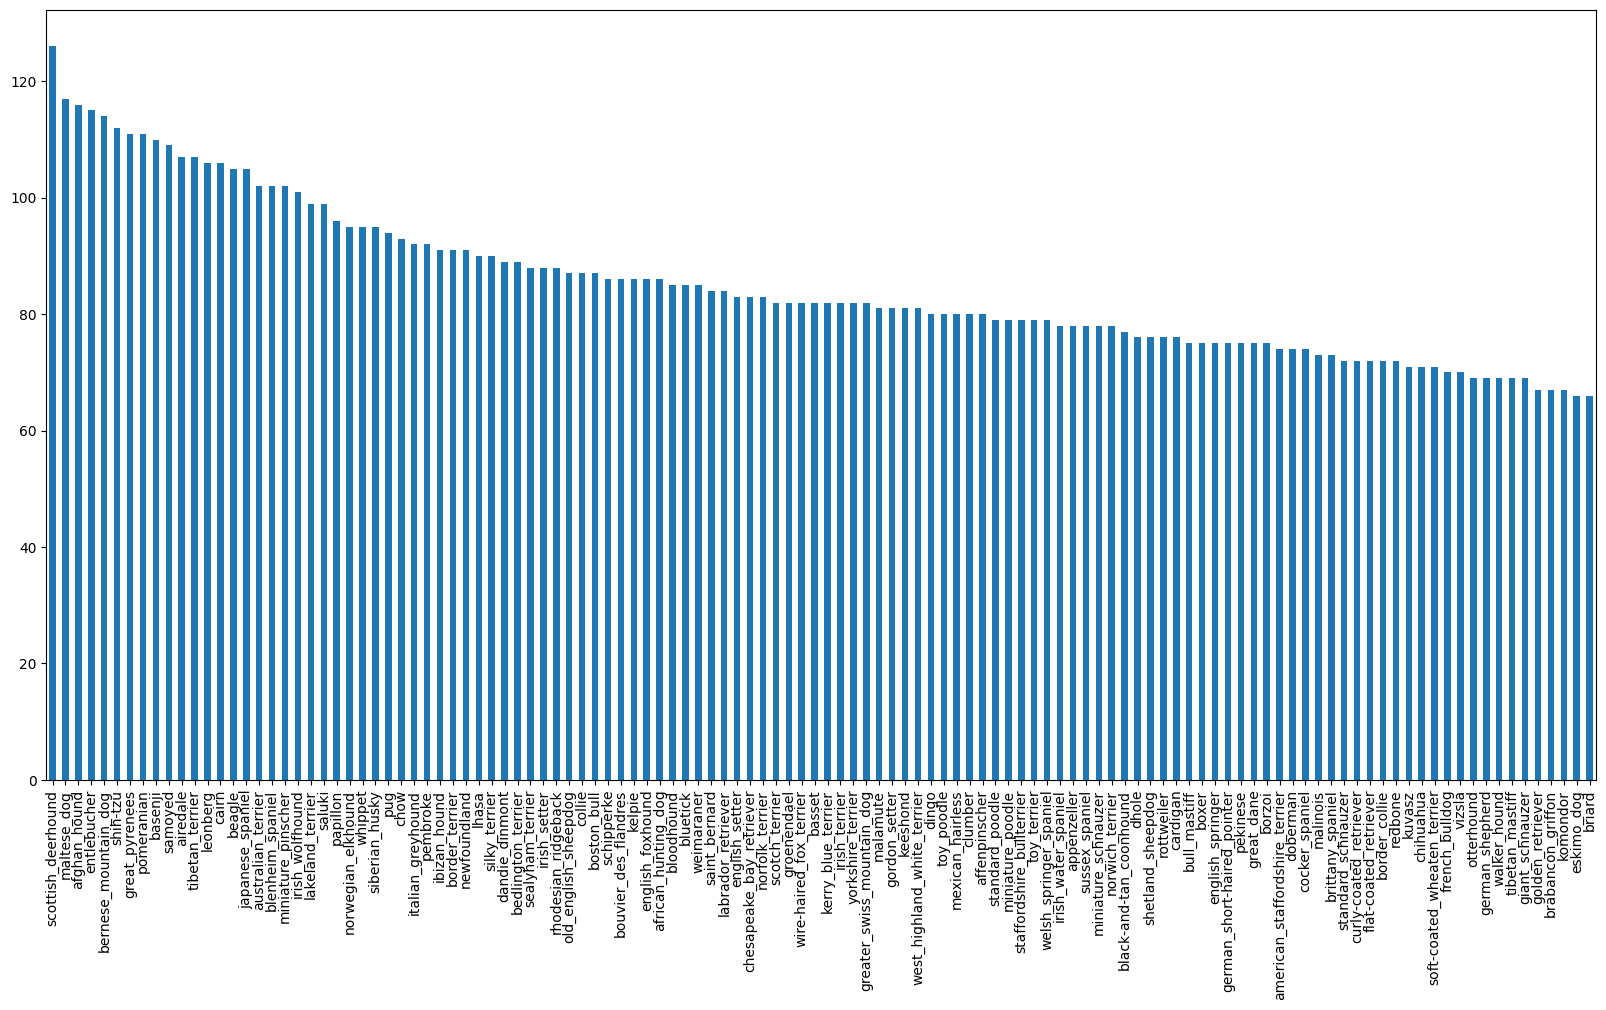

In [ ]:
# visualize data
label_csv.breed.value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels = label_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

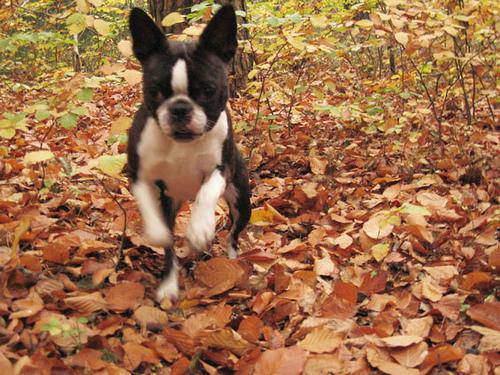

In [ ]:
from IPython.display import Image
# drive/My Drive/deep-learning-project/train/011e06760794850c40f23d6426c40774.jpg
Image("drive/My Drive/deep-learning-project/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
# Getting images and thier labels
files = [
 "drive/My Drive/deep-learning-project/data/train/" + name + ".jpg" for name in label_csv["id"]]
files[:10]

['drive/My Drive/deep-learning-project/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/deep-learning-project/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/deep-learning-project/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/deep-learning-project/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/deep-learning-project/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/deep-learning-project/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/deep-learning-project/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/deep-learning-project/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/deep-learning-project/data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/deep-learning-project/data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# find unique labels
unique_breeds = np.unique(label_csv["breed"])
len(unique_breeds)

120

In [ ]:
# turn a single label into array of bool
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# bool array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[2]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Create your own validation set


In [ ]:
# initialize vars
X = files
Y = boolean_labels
len(X), len(Y)

(10222, 10222)

In [ ]:
# set number of images
NUM_IMAGES = 1000 # @param{type:"slider", "min":100, "max":10000}

In [ ]:
# Split data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  Y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Preprocessing images ( turning images into Tensors )
# numerical representation of data

# 1. Take image filepath as input
# 2. Use tensorflow to read file and save it to a variable , 'image'
# 3. Turn image into tensors
# 4. Normalize image ( convert 0-255 to 0-1 )
# 5. Resize the image to be a shape of (224, 224)
# 6. Return the modified image


In [ ]:
IMZ_SIZE = 224


def process_image(image_path):
  """
  Takes image and turns into tensor
  """

  # read image file
  image = tf.io.read_file(image_path)

  # turn image into numerical tesnors ( RGB )
  image = tf.image.decode_jpeg(image, channels=3)

  # convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # resize image
  image = tf.image.resize(image, size=[IMZ_SIZE, IMZ_SIZE])

  return image


In [ ]:
X[42]

'drive/My Drive/deep-learning-project/data/train/011e06760794850c40f23d6426c40774.jpg'

In [ ]:
# Turning data into batches
# Ideal size is : 32
# should look like this ( image, tuple )

In [ ]:
from tensorflow.python.ops.variables import local_variables_initializer
# create a function to return tuple (image, label)

def get_image_label(image_path, label):

  image = process_image(image_path)
  return image, label

In [ ]:
# data will look like [ tuple (image, label) ]
(process_image(X[42]), tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# Define batch size, 32 is ideal
BATCH_SIZE=32
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data of image ( X) and label (y)
  Shuffle => Train data
  Do not Shuffle => Valid data
  Also accept test data as input ( afcourse no labels )
  """

  if test_data:
    print("Creating test data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only files not labels
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
     (tf.constant(y))))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # train data
    print("Creating train data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
     (tf.constant(y))))

    # shuffling pathnames and labels before mapping image processor function
    # is faster as compare will do after process_image
    data = data.shuffle(buffer_size=len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch



In [ ]:
# creating training and valid data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches
Creating validation data batches


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(30):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 6, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    # print(labels[i].argmax())
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

(32, 32)

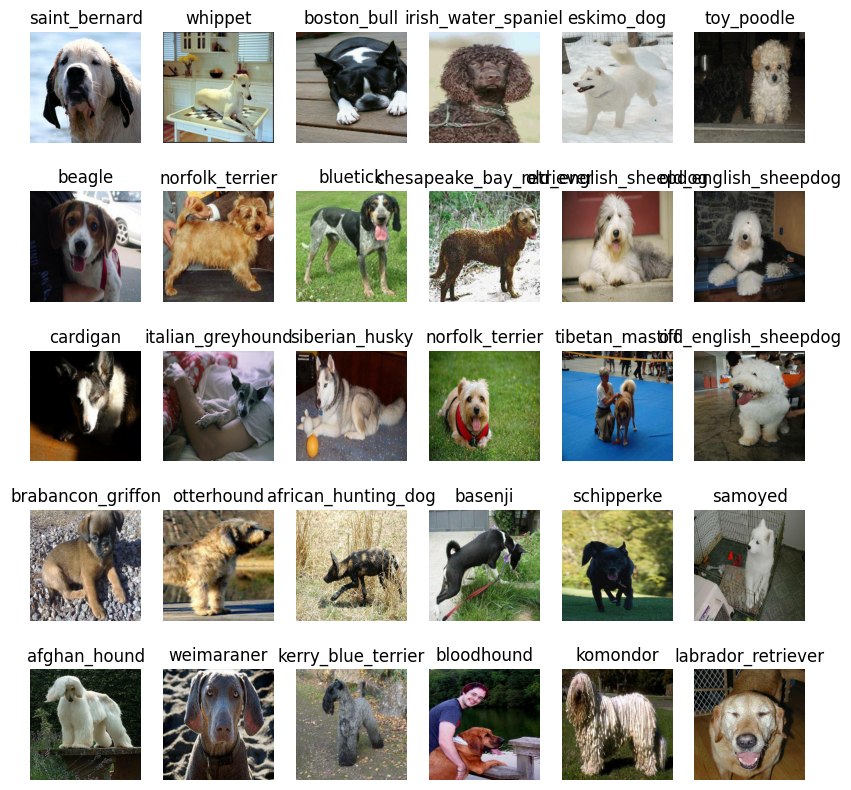

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)
len(train_images), len(train_labels)

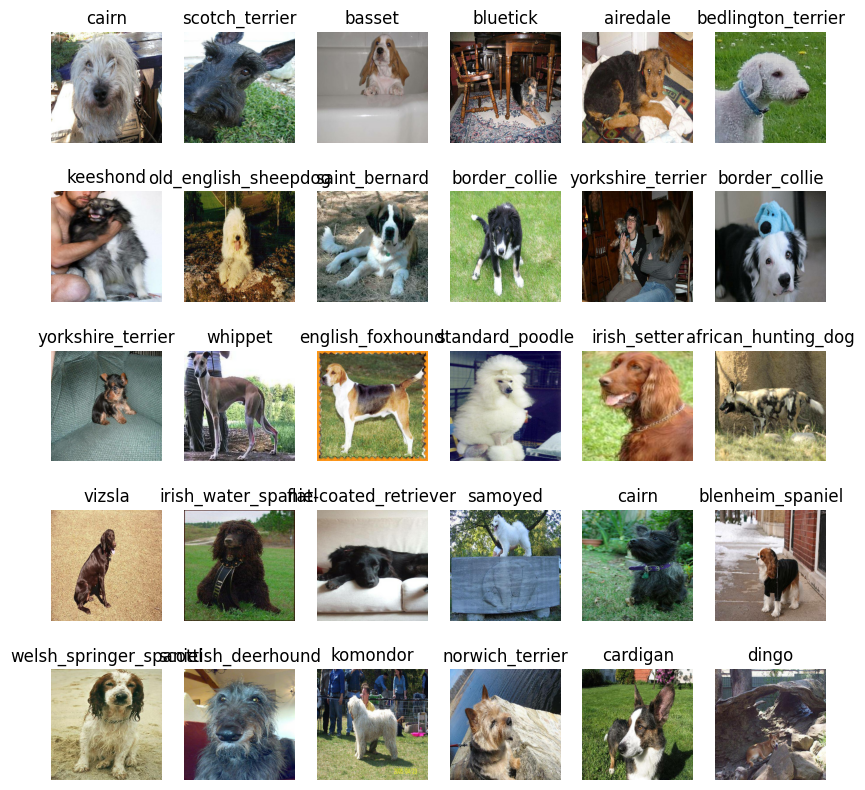

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things we need to define:

1. The input shape (our images shape, in the form of Tensors) to our model.
2. The output shape (image labels, in the form of Tensors) of our model.
3. The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, 224, 224, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.
* All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  """
  Which activation?
  Binary Classification : Activation-Sigmoid, Loss : Binary Crossentropy
  Multi-class Classification : Activation-Softmax, Loss : Categorical Crossentropy

  """
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime, os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/deep-learning-project/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback
Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}
# Number of passes => modlel trying to find patterns in each dog image

## Let's create a function which trains a model.

* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 387s 15s/step - loss: 4.5969 - accuracy: 0.0988 - val_loss: 3.5570 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 5s 186ms/step - loss: 1.6662 - accuracy: 0.6825 - val_loss: 2.2765 - val_accuracy: 0.4650
Epoch 3/100
25/25 [==============================] - 3s 116ms/step - loss: 0.5852 - accuracy: 0.9250 - val_loss: 1.7727 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2535 - accuracy: 0.9912 - val_loss: 1.5595 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 5s 191ms/step - loss: 0.1485 - accuracy: 0.9962 - val_loss: 1.4672 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 3s 116ms/step - loss: 0.0996 - accuracy: 0.9987 - val_loss: 1.4207 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================

## Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/deep-learning-project/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Make predictions on the validation data ( not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions
# 200 / 32 ~ 7 , refers the batches
# 800 / 32 ~ 25

7/7 [==============================] - 3s 94ms/step


array([[5.1910151e-04, 1.1696225e-03, 3.9254394e-03, ..., 1.4947484e-03,
        2.6283824e-05, 1.5500006e-03],
       [1.2524358e-03, 1.5114811e-03, 3.6096461e-02, ..., 1.3733603e-04,
        4.9230335e-03, 2.5945442e-04],
       [2.0887726e-05, 6.2764644e-05, 2.1658758e-05, ..., 3.7587797e-05,
        2.2047554e-05, 3.7256198e-04],
       ...,
       [4.1027251e-06, 1.2949789e-04, 6.8562978e-05, ..., 2.8581817e-05,
        1.0166781e-04, 1.8726198e-04],
       [1.2836409e-03, 2.9479244e-04, 7.7584249e-05, ..., 9.0758564e-05,
        5.6030935e-05, 1.8780155e-02],
       [2.9500018e-04, 4.6513134e-05, 4.4717040e-04, ..., 5.6039831e-03,
        1.5383085e-03, 2.8114000e-04]], dtype=float32)

In [ ]:
predictions.shape
# data, unique breed

(200, 120)

In [ ]:
predictions[0], len(predictions[0]), np.sum(predictions[0])
# probability for each image

(array([5.1910151e-04, 1.1696225e-03, 3.9254394e-03, 1.6940747e-04,
        1.6565211e-03, 1.3634385e-05, 1.7223883e-02, 2.6452396e-04,
        2.0065498e-04, 9.6582377e-04, 2.3310175e-04, 1.4969026e-04,
        1.3644370e-04, 7.8979072e-05, 1.2859928e-04, 9.2838402e-04,
        1.1329361e-04, 2.0493461e-01, 6.6372595e-05, 1.0308646e-04,
        3.3777545e-04, 3.6554955e-04, 3.5877933e-05, 1.1674544e-03,
        9.6760174e-05, 1.1289895e-04, 1.8725395e-01, 8.6773813e-05,
        5.3857232e-04, 1.1916317e-04, 9.3563547e-05, 2.5838244e-04,
        7.5818098e-04, 4.0441948e-05, 1.3618148e-04, 5.9180823e-03,
        3.3055199e-05, 1.3393065e-04, 7.3513882e-05, 2.4808489e-04,
        3.7317074e-04, 2.7398079e-05, 9.1959961e-04, 5.9369841e-04,
        9.3998206e-06, 6.6752327e-05, 2.8494493e-05, 7.6627627e-04,
        9.4517331e-05, 1.1663071e-04, 4.0930139e-05, 2.9409295e-05,
        8.7305892e-04, 2.9690398e-05, 1.3063177e-04, 9.3597468e-05,
        2.9984568e-04, 1.8075801e-03, 1.8351605e

In [ ]:
predictions[0].argmax(), predictions[0][26]


(17, 0.18725395)

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.02791775e-05 5.09337260e-05 1.58031853e-05 1.77849852e-05
 1.39169185e-03 2.76969677e-05 8.56731131e-05 9.85207036e-04
 1.68672800e-02 3.92703712e-02 2.91506185e-05 7.04647528e-06
 2.89793476e-04 2.50951597e-03 8.48148542e-04 2.67396937e-03
 1.07121068e-05 1.30667438e-04 6.89418594e-05 2.68617237e-04
 1.34889651e-05 2.37748260e-04 4.50766056e-05 1.70286548e-05
 6.48115668e-03 5.18914676e-05 1.19947661e-04 5.23083669e-04
 2.18970061e-04 9.73735441e-05 2.80274871e-05 1.79925519e-05
 3.14503050e-05 2.88317278e-05 2.09574719e-05 1.57099748e-05
 1.85528232e-04 3.94382456e-04 4.10304310e-05 3.15311223e-01
 1.00525758e-04 2.20105885e-05 1.87077257e-03 9.47866010e-06
 1.37602270e-04 7.27778825e-05 1.48348132e-04 1.31928164e-03
 1.02807651e-04 7.78586196e-04 2.71308909e-05 7.50298423e-05
 5.80711174e-04 1.96431810e-03 1.35268128e-05 4.63492033e-04
 7.68767568e-05 6.37022604e-05 1.82396150e-04 1.10635974e-05
 2.98718020e-04 1.15983677e-03 8.92860407e-06 5.63047724e-05
 3.51269817e-04 1.258662

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[80])
pred_label

'pug'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0] , len(val_images)

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

Now we've got ways to get :

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [ ]:
predictions

array([[5.1910151e-04, 1.1696225e-03, 3.9254394e-03, ..., 1.4947484e-03,
        2.6283824e-05, 1.5500006e-03],
       [1.2524358e-03, 1.5114811e-03, 3.6096461e-02, ..., 1.3733603e-04,
        4.9230335e-03, 2.5945442e-04],
       [2.0887726e-05, 6.2764644e-05, 2.1658758e-05, ..., 3.7587797e-05,
        2.2047554e-05, 3.7256198e-04],
       ...,
       [4.1027251e-06, 1.2949789e-04, 6.8562978e-05, ..., 2.8581817e-05,
        1.0166781e-04, 1.8726198e-04],
       [1.2836409e-03, 2.9479244e-04, 7.7584249e-05, ..., 9.0758564e-05,
        5.6030935e-05, 1.8780155e-02],
       [2.9500018e-04, 4.6513134e-05, 4.4717040e-04, ..., 5.6039831e-03,
        1.5383085e-03, 2.8114000e-04]], dtype=float32)

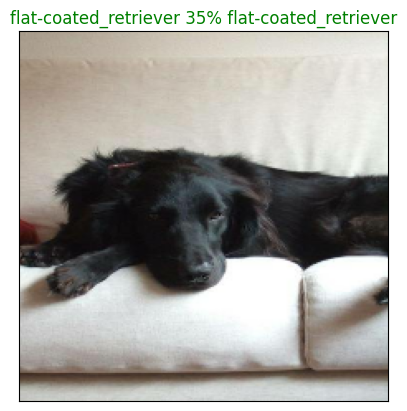

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=20)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅
* Find the top 10:
** Prediction probabilities indexes ✅
** Prediction probabilities values ✅
** Prediction labels ✅
*Plot the top 10 prediction probability values and labels, coloring the true label green ✅

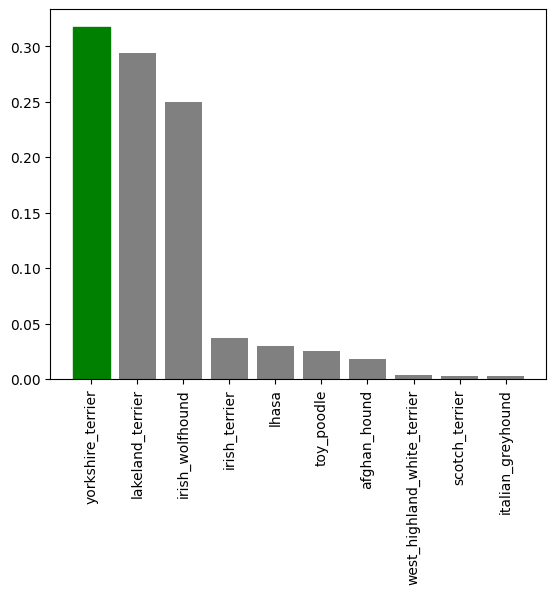

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

plot_pred_conf(predictions, val_labels, n=10)

In [ ]:
# top 10 indexes
predictions[0].argsort()[-10:][::-1]

array([ 17,  26,  70,  59,  65, 109,  79, 106,  73,  97])

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]

array([0.20493461, 0.18725395, 0.12531847, 0.08588753, 0.06897399,
       0.0477679 , 0.04324809, 0.03223779, 0.02660617, 0.0226167 ],
      dtype=float32)

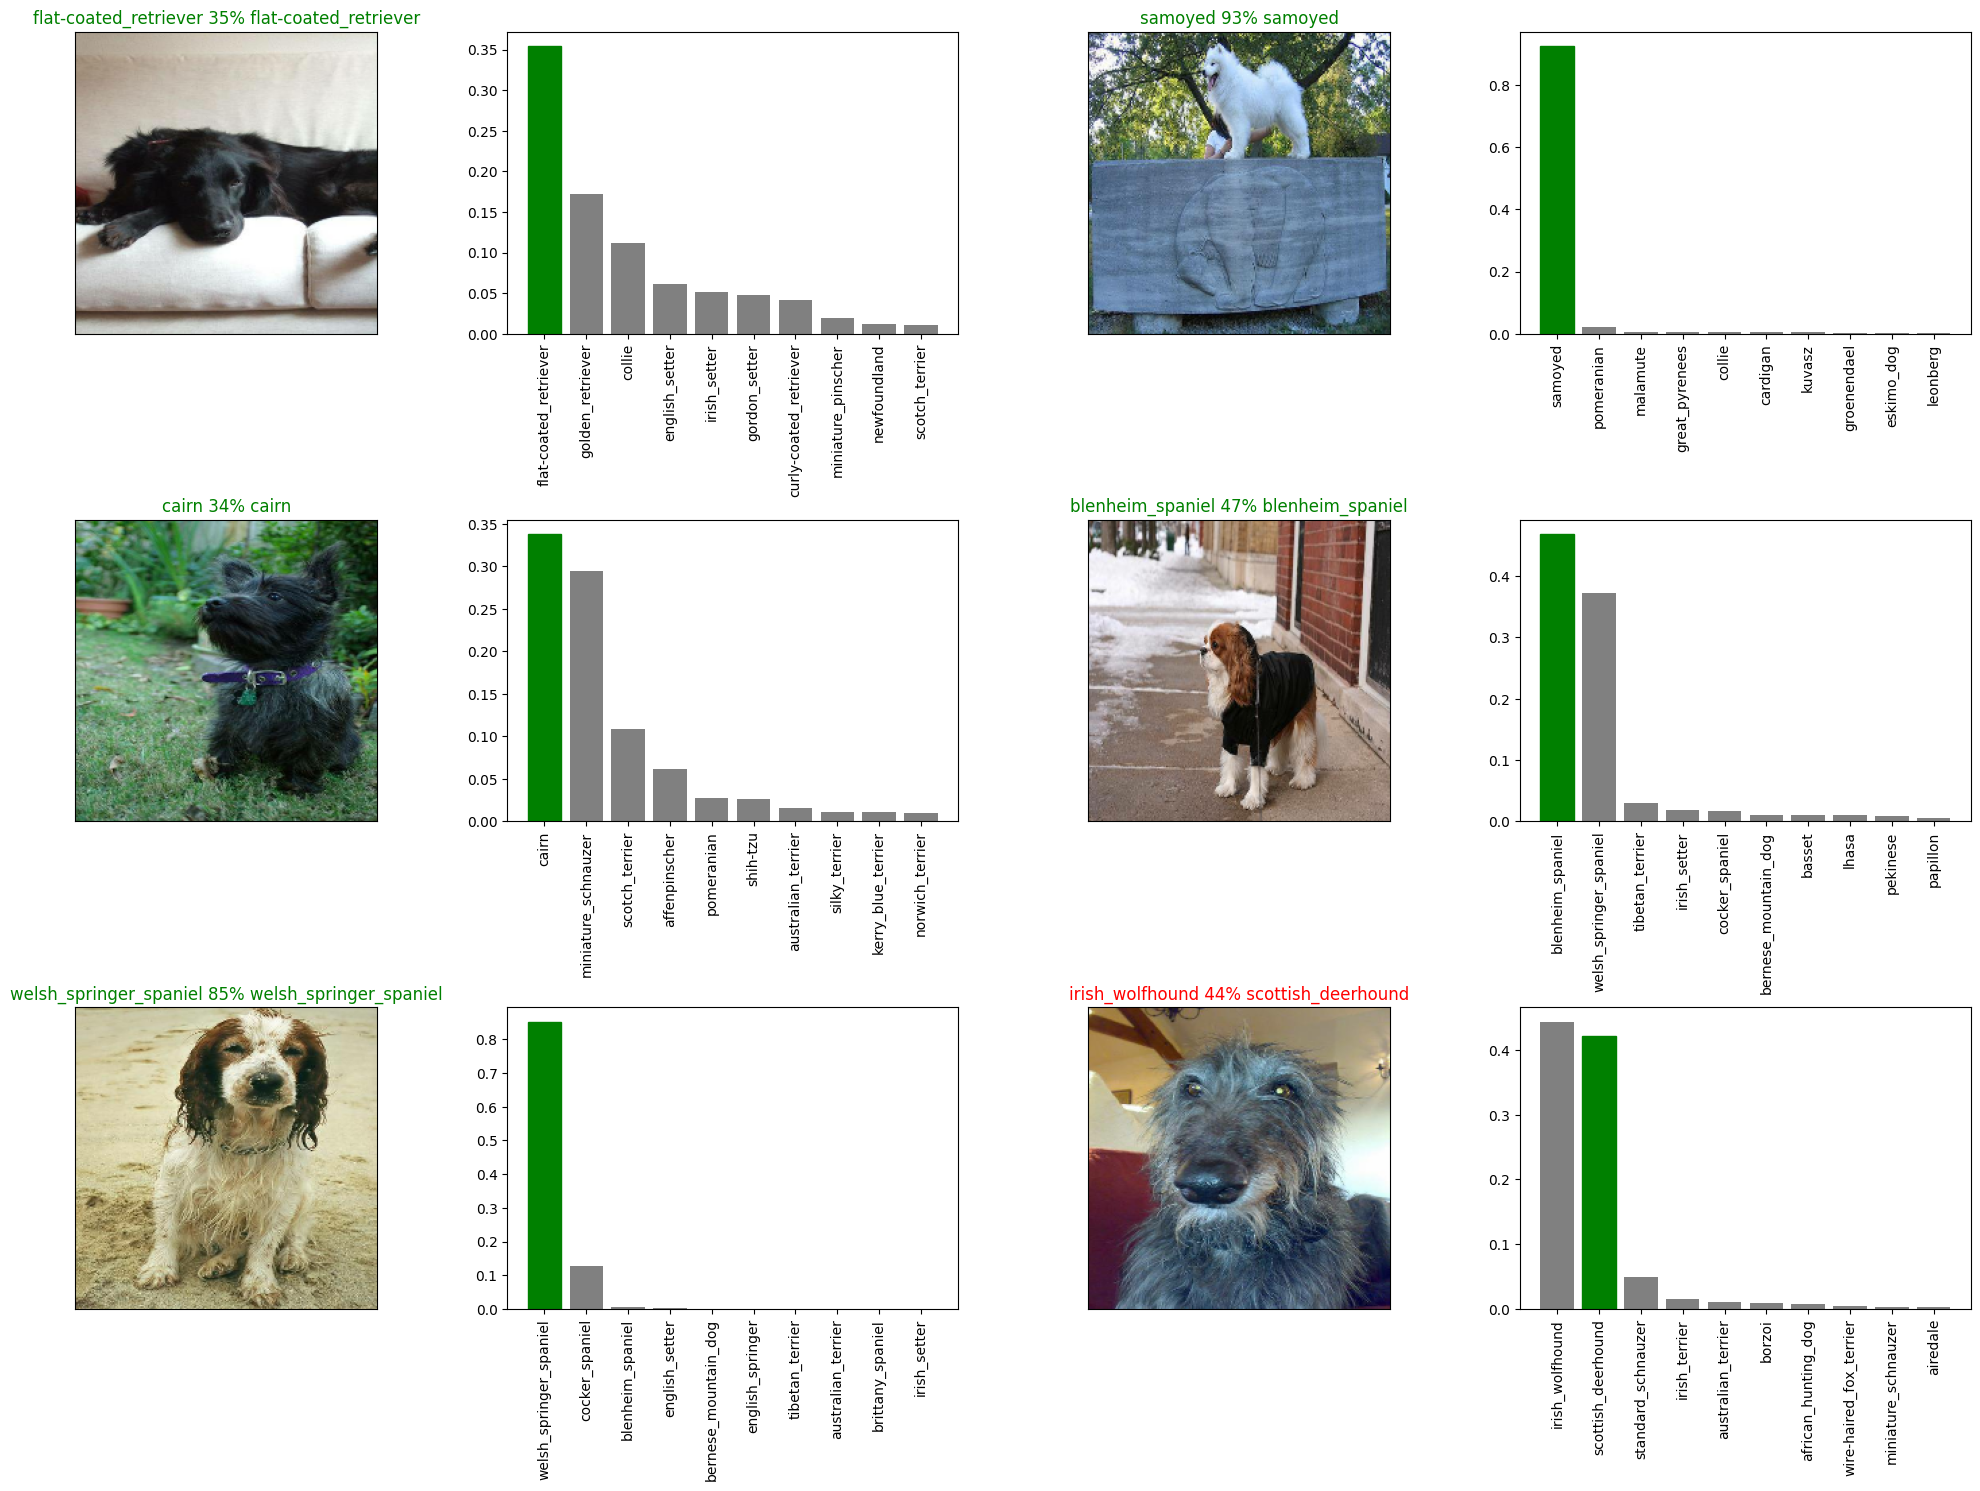

In [ ]:
# advance : showing => can ignore
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/My Drive/deep-learning-project/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

save_model(model, suffix="1000-images-mobilenetv2")


Saving model to: drive/My Drive/deep-learning-project/models/20230907-08531694076804-1000-images-mobilenetv2.h5...


'drive/My Drive/deep-learning-project/models/20230907-08531694076804-1000-images-mobilenetv2.h5'

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

loaded_1000_image_model = load_model("drive/My Drive/deep-learning-project/models/20230903-19351693769728-1000-images-mobilenetv2.h5")

Loading saved model from: drive/My Drive/deep-learning-project/models/20230903-19351693769728-1000-images-mobilenetv2.h5


In [ ]:
# Evaluate pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 96ms/step - loss: 1.2784 - accuracy: 0.6850


[1.278437852859497, 0.6850000023841858]

In [ ]:
# Evaluate loaded model to cross-verify
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 86ms/step - loss: 1.2179 - accuracy: 0.6550


[1.2179416418075562, 0.6549999713897705]

## Training a big dog model on the all data

In [ ]:
len(X), len(Y)

(10222, 10222)

In [ ]:
# create batches
full_data = create_data_batches(X, Y)

Creating train data batches


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 907s 3s/step - loss: 1.3328 - accuracy: 0.6711
Epoch 2/100
320/320 [==============================] - 658s 2s/step - loss: 0.3972 - accuracy: 0.8846
Epoch 3/100
102/320 [========>.....................] - ETA: 7:37 - loss: 0.2084 - accuracy: 0.9510

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2")

In [ ]:
# Load in the full model
loaded_full_model = load_model("")

## Making predictions on the test dataset

To make predictions on the test data, we'll:

1. Get the test image filenames. ✅
2. Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
3. Make a predictions array by passing the test batches to the predict() method called on our mode

In [ ]:
# Load test image filenames
test_path = "drive/My Drive/deep-learning-project/data/test"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

196/324 [=================>............] - ETA: 25:10